In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# print = pretty_print

# 4

$$
(\text{cond}f(x))=\left|\frac{xf'(x)}{f(x)}\right|
$$

In [3]:
def cond(f, x):
    return abs((x * f.diff(x)) / f)

In [4]:
def perturb_ec(ec, x, dist):
    dist = RealDistribution("gaussian", 10**-10)
    new_ec = 0
    for operand in ec.operands():
        new_operand = 1
        perturbation = dist.get_random_element()
        for val, power in operand.factor_list():
            if bool(val != x):
                assert bool(power == 1)
                new_operand *= val+perturbation
            else:
                new_operand *= val**power
            new_ec += new_operand
    return new_ec

In [54]:
def test(ec, x, dist):
    ec = ec.expand()
    ec_roots = ec.roots()
    ec_cond = cond(ec, x)

    pretty_print(LatexExpr("f(x)="), ec)
    pretty_print(LatexExpr("(\\text{cond}f)(x)="), ec_cond)

    print("Radacini")
    for root, _ in ec_roots:
        print(root)
    
    samples = {root: [] for root, _ in ec_roots}
    for _ in range(100):
        new_ec = perturb_ec(ec, x, dist)
        for root, _ in ec_roots:
            samples[root].append(new_ec.substitute(x=root).n())
    
    for root, values in samples.items():
        has_imag = False
        
        xa = []
        ya = []
        for value in values:
            xa.append(value.real())
            has_imag |= bool(value.imag() != 0)
            ya.append(value.imag())
        xa = np.array(xa)
        ya = np.array(ya)

        if has_imag:
            fig = plt.figure()
            ax = fig.add_subplot(projection="3d")

            hist, xedges, yedges = np.histogram2d(xa, ya, bins=4)
            # NOTE: Have to multiply x and y axes by some big number, because
            # otherwise matplotlib just puts everything in one bin.
            xedges *= float(10**10)
            yedges *= float(10**10)

            # Construct arrays for the anchor positions of the 16 bars.
            xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
            
            xpos = xpos.ravel()
            ypos = ypos.ravel()
            zpos = 0

            # Construct arrays with the dimensions for the 16 bars.
            dx = dy = 0.5 * np.ones_like(zpos)
            dz = hist.ravel()

            ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort="average")
        else:
            fig = plt.figure()
            ax = fig.add_subplot()
            plt.hist(xa)

        pretty_print(LatexExpr("r="), root)
        plt.show()

In [6]:
dist_gauss = RealDistribution("gaussian", 10**-10)
dist_unif = RealDistribution("uniform", [-1, 1])

f(x)= x^20 + 1/2*x^19 + 1/4*x^18 + 1/8*x^17 + 1/16*x^16 + 1/32*x^15 + 1/64*x^14 + 1/128*x^13 + 1/256*x^12 + 1/512*x^11 + 1/1024*x^10 + 1/2048*x^9 + 1/4096*x^8 + 1/8192*x^7 + 1/16384*x^6 + 1/32768*x^5 + 1/65536*x^4 + 1/131072*x^3 + 1/262144*x^2 + 1/524288*x + 1/1048576

(\text{cond}f)(x)= 2*abs((10485760*x^19 + 4980736*x^18 + 2359296*x^17 + 1114112*x^16 + 524288*x^15 + 245760*x^14 + 114688*x^13 + 53248*x^12 + 24576*x^11 + 11264*x^10 + 5120*x^9 + 2304*x^8 + 1024*x^7 + 448*x^6 + 192*x^5 + 80*x^4 + 32*x^3 + 12*x^2 + 4*x + 1)*x/(1048576*x^20 + 524288*x^19 + 262144*x^18 + 131072*x^17 + 65536*x^16 + 32768*x^15 + 16384*x^14 + 8192*x^13 + 4096*x^12 + 2048*x^11 + 1024*x^10 + 512*x^9 + 256*x^8 + 128*x^7 + 64*x^6 + 32*x^5 + 16*x^4 + 8*x^3 + 4*x^2 + 2*x + 1))

Radacini
-1/4*I*sqrt(3) - 1/4
1/4*I*sqrt(3) - 1/4


r= -1/4*I*sqrt(3) - 1/4

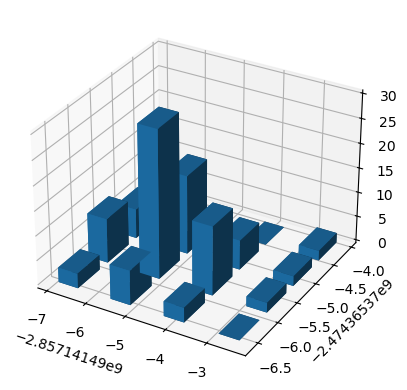

r= 1/4*I*sqrt(3) - 1/4

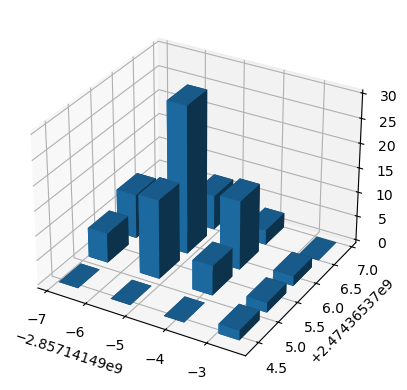

In [55]:
def ec_1(n, a_k):
    x = var("x")
    ec = 0
    for i in range(n+1):
        t = x**i
        if i < n:
            t *= a_k.substitute(k=n-i)
        ec += t
    return x, ec

k = var("k")
a_k = 2**(-k)
x, ec = ec_1(20, a_k)
test(ec, x, dist_gauss)

f(x)= x^20 + 1/2*x^19 + 1/4*x^18 + 1/8*x^17 + 1/16*x^16 + 1/32*x^15 + 1/64*x^14 + 1/128*x^13 + 1/256*x^12 + 1/512*x^11 + 1/1024*x^10 + 1/2048*x^9 + 1/4096*x^8 + 1/8192*x^7 + 1/16384*x^6 + 1/32768*x^5 + 1/65536*x^4 + 1/131072*x^3 + 1/262144*x^2 + 1/524288*x + 1/1048576

(\text{cond}f)(x)= 2*abs((10485760*x^19 + 4980736*x^18 + 2359296*x^17 + 1114112*x^16 + 524288*x^15 + 245760*x^14 + 114688*x^13 + 53248*x^12 + 24576*x^11 + 11264*x^10 + 5120*x^9 + 2304*x^8 + 1024*x^7 + 448*x^6 + 192*x^5 + 80*x^4 + 32*x^3 + 12*x^2 + 4*x + 1)*x/(1048576*x^20 + 524288*x^19 + 262144*x^18 + 131072*x^17 + 65536*x^16 + 32768*x^15 + 16384*x^14 + 8192*x^13 + 4096*x^12 + 2048*x^11 + 1024*x^10 + 512*x^9 + 256*x^8 + 128*x^7 + 64*x^6 + 32*x^5 + 16*x^4 + 8*x^3 + 4*x^2 + 2*x + 1))

Radacini
-1/4*I*sqrt(3) - 1/4
1/4*I*sqrt(3) - 1/4


r= -1/4*I*sqrt(3) - 1/4

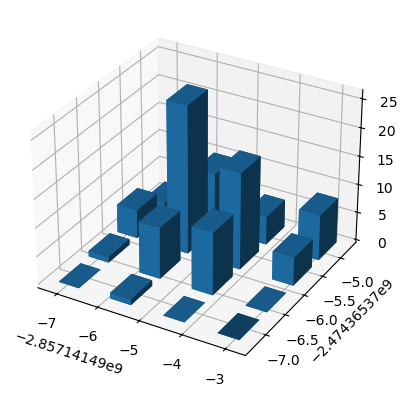

r= 1/4*I*sqrt(3) - 1/4

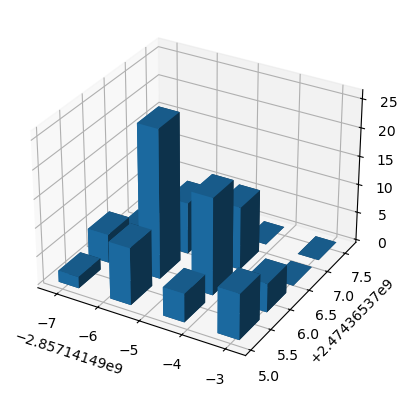

In [56]:
test(ec, x, dist_unif)

f(x)= x^20 - 210*x^19 + 20615*x^18 - 1256850*x^17 + 53327946*x^16 - 1672280820*x^15 + 40171771630*x^14 - 756111184500*x^13 + 11310276995381*x^12 - 135585182899530*x^11 + 1307535010540395*x^10 - 10142299865511450*x^9 + 63030812099294896*x^8 - 311333643161390640*x^7 + 1206647803780373360*x^6 - 3599979517947607200*x^5 + 8037811822645051776*x^4 - 12870931245150988800*x^3 + 13803759753640704000*x^2 - 8752948036761600000*x + 2432902008176640000

(\text{cond}f)(x)= 2*abs((10*x^19 - 1995*x^18 + 185535*x^17 - 10683225*x^16 + 426623568*x^15 - 12542106150*x^14 + 281202401410*x^13 - 4914722699250*x^12 + 67861661972286*x^11 - 745718505947415*x^10 + 6537675052701975*x^9 - 45640349394801525*x^8 + 252123248397179584*x^7 - 1089667751064867240*x^6 + 3619943411341120080*x^5 - 8999948794869018000*x^4 + 16075623645290103552*x^3 - 19306396867726483200*x^2 + 13803759753640704000*x - 4376474018380800000)*x/(x^20 - 210*x^19 + 20615*x^18 - 1256850*x^17 + 53327946*x^16 - 1672280820*x^15 + 40171771630*x^14 - 756111184500*x^13 + 11310276995381*x^12 - 135585182899530*x^11 + 1307535010540395*x^10 - 10142299865511450*x^9 + 63030812099294896*x^8 - 311333643161390640*x^7 + 1206647803780373360*x^6 - 3599979517947607200*x^5 + 8037811822645051776*x^4 - 12870931245150988800*x^3 + 13803759753640704000*x^2 - 8752948036761600000*x + 2432902008176640000))

Radacini
19
20
18
16
17
14
15
13
11
12
9
10
8
6
7
4
5
3
1
2


r= 19

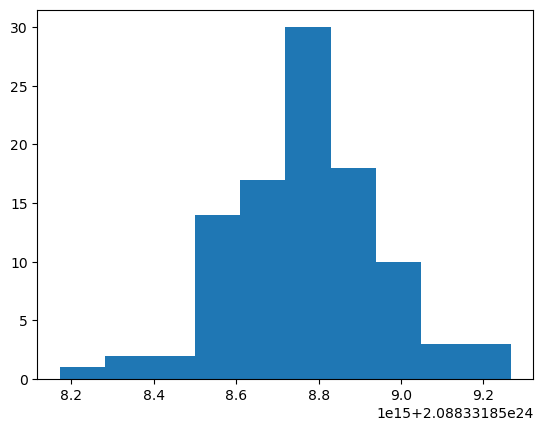

r= 20

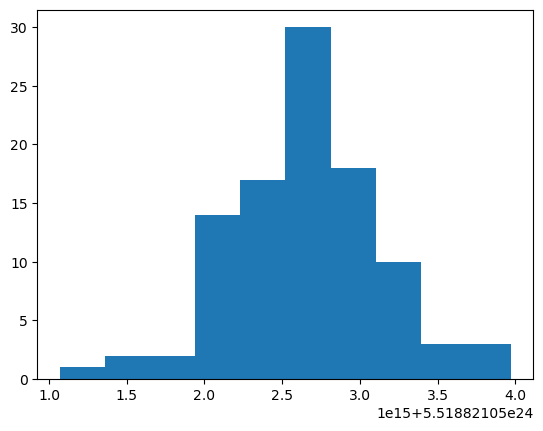

r= 18

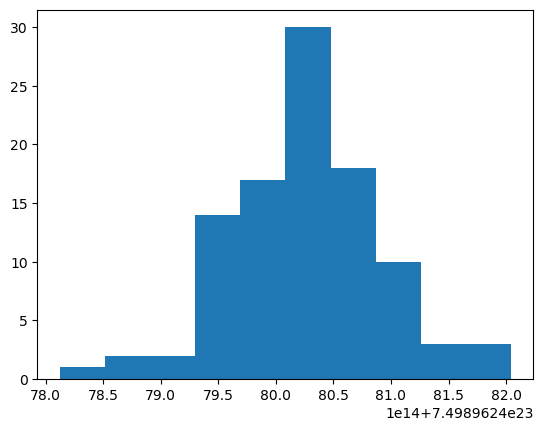

r= 16

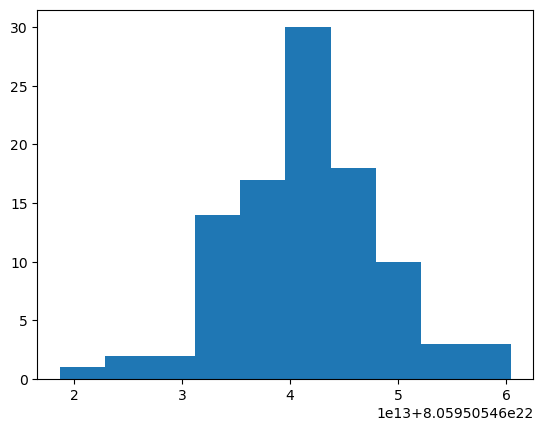

r= 17

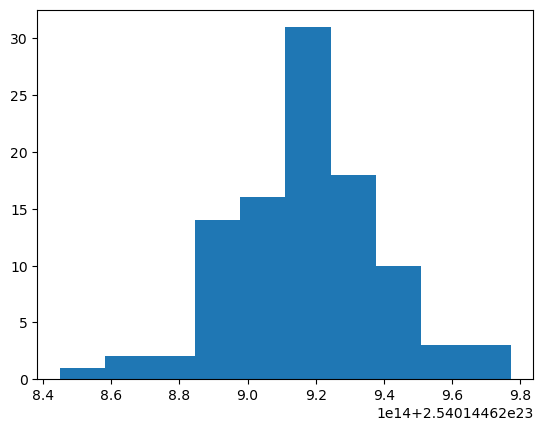

r= 14

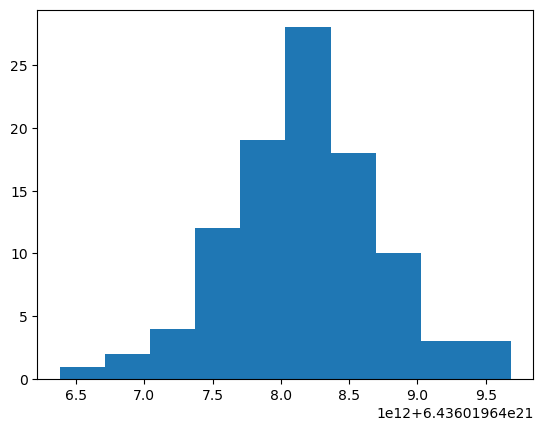

r= 15

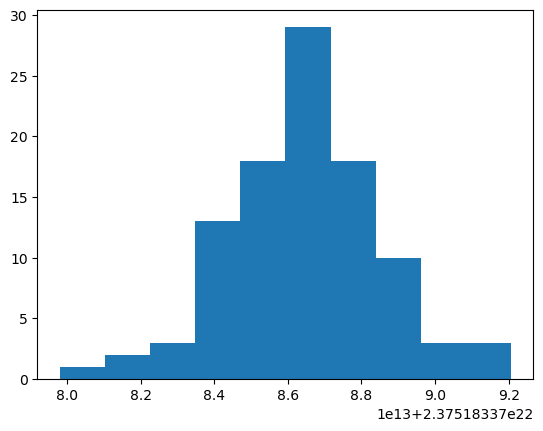

r= 13

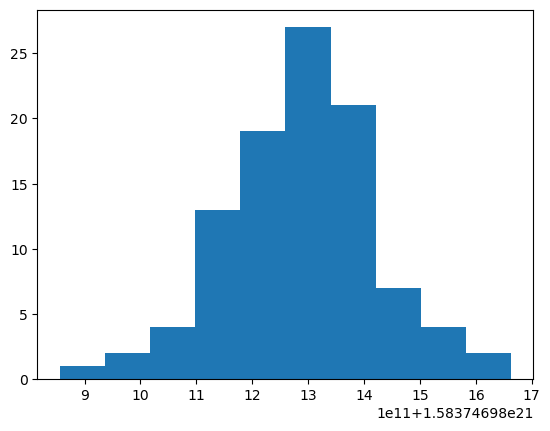

r= 11

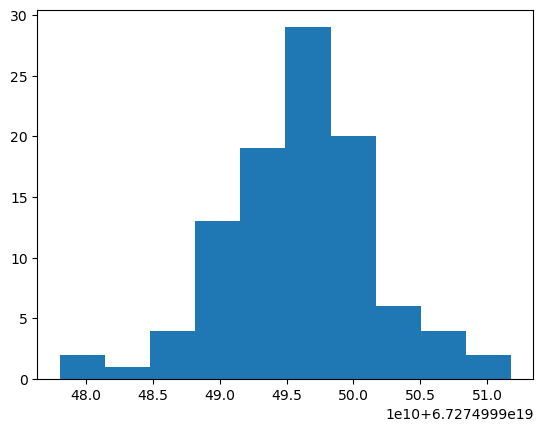

r= 12

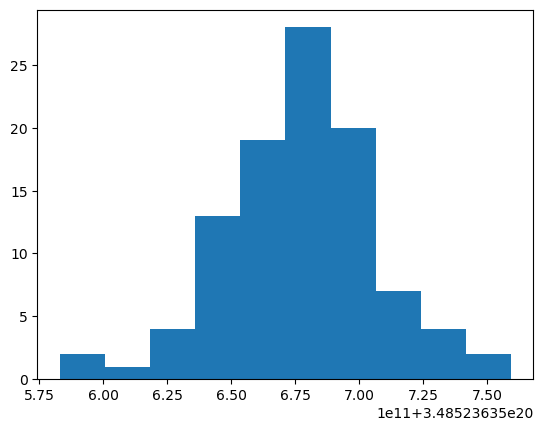

r= 9

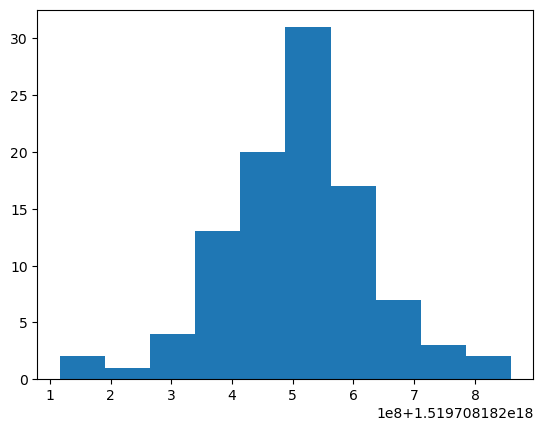

r= 10

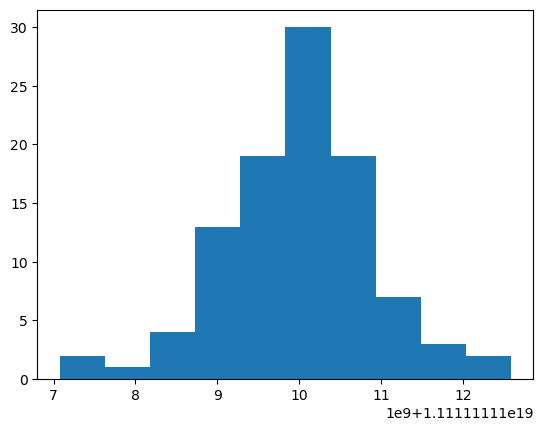

r= 8

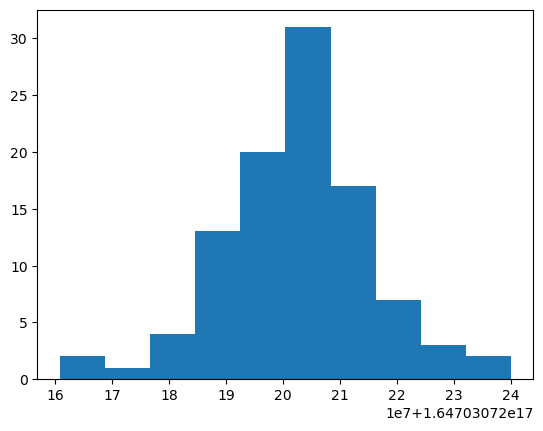

r= 6

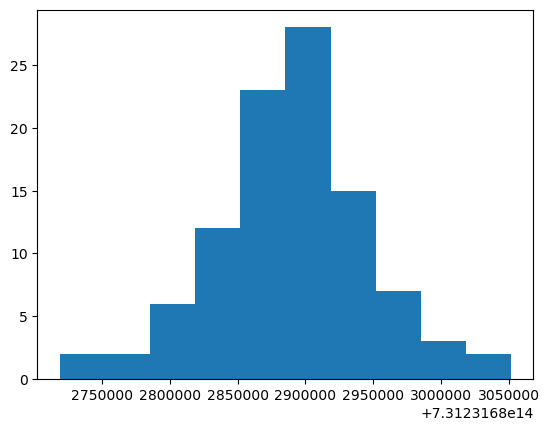

r= 7

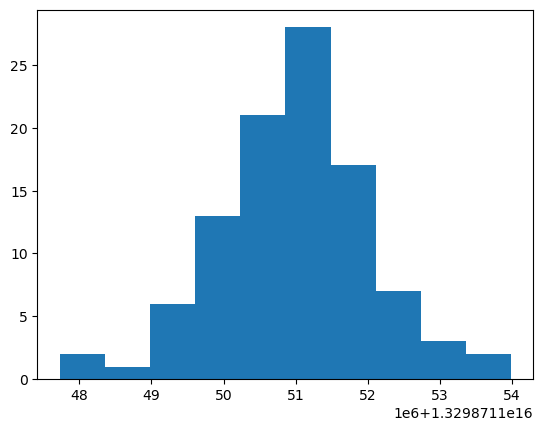

r= 4

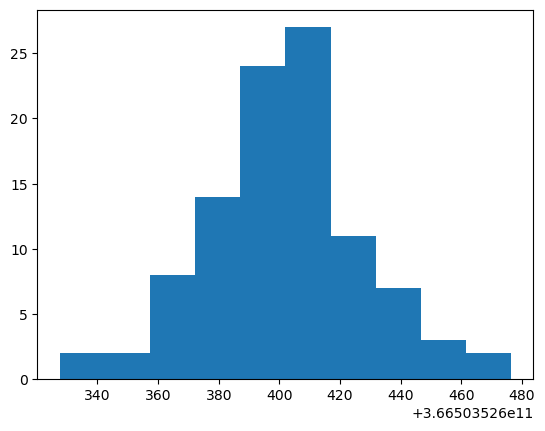

r= 5

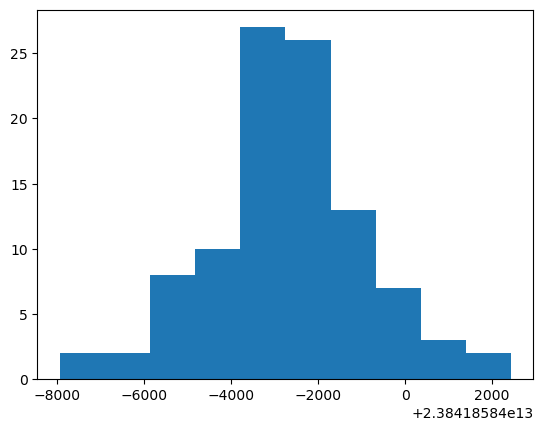

r= 3

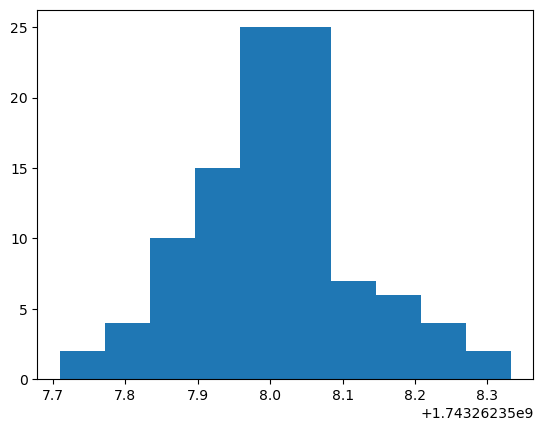

r= 1

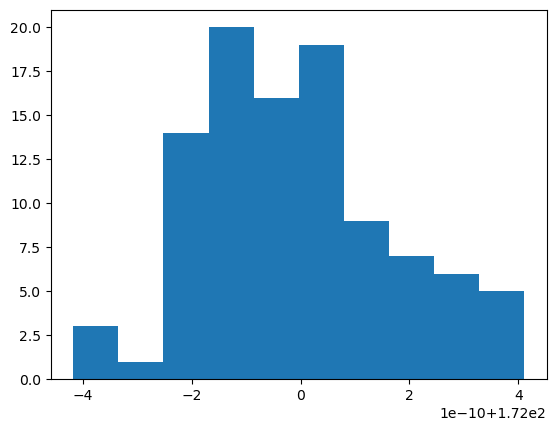

r= 2

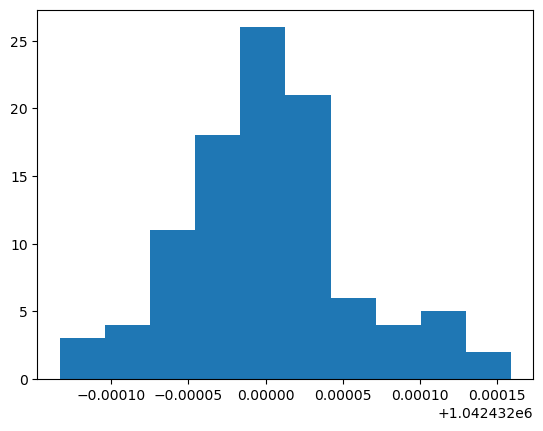

In [57]:
def ec_2(n):
    x = var("x")
    ec = 1
    for i in range(1, n+1):
        ec *= (x-i)
    return x, ec

x, ec = ec_2(20)
test(ec, x, dist_gauss)

f(x)= x^20 - 210*x^19 + 20615*x^18 - 1256850*x^17 + 53327946*x^16 - 1672280820*x^15 + 40171771630*x^14 - 756111184500*x^13 + 11310276995381*x^12 - 135585182899530*x^11 + 1307535010540395*x^10 - 10142299865511450*x^9 + 63030812099294896*x^8 - 311333643161390640*x^7 + 1206647803780373360*x^6 - 3599979517947607200*x^5 + 8037811822645051776*x^4 - 12870931245150988800*x^3 + 13803759753640704000*x^2 - 8752948036761600000*x + 2432902008176640000

(\text{cond}f)(x)= 2*abs((10*x^19 - 1995*x^18 + 185535*x^17 - 10683225*x^16 + 426623568*x^15 - 12542106150*x^14 + 281202401410*x^13 - 4914722699250*x^12 + 67861661972286*x^11 - 745718505947415*x^10 + 6537675052701975*x^9 - 45640349394801525*x^8 + 252123248397179584*x^7 - 1089667751064867240*x^6 + 3619943411341120080*x^5 - 8999948794869018000*x^4 + 16075623645290103552*x^3 - 19306396867726483200*x^2 + 13803759753640704000*x - 4376474018380800000)*x/(x^20 - 210*x^19 + 20615*x^18 - 1256850*x^17 + 53327946*x^16 - 1672280820*x^15 + 40171771630*x^14 - 756111184500*x^13 + 11310276995381*x^12 - 135585182899530*x^11 + 1307535010540395*x^10 - 10142299865511450*x^9 + 63030812099294896*x^8 - 311333643161390640*x^7 + 1206647803780373360*x^6 - 3599979517947607200*x^5 + 8037811822645051776*x^4 - 12870931245150988800*x^3 + 13803759753640704000*x^2 - 8752948036761600000*x + 2432902008176640000))

Radacini
19
20
18
16
17
14
15
13
11
12
9
10
8
6
7
4
5
3
1
2


r= 19

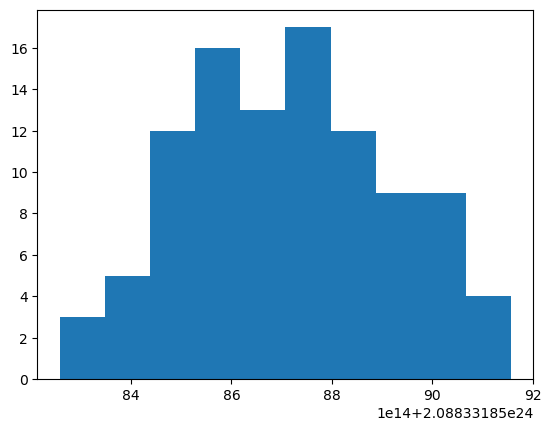

r= 20

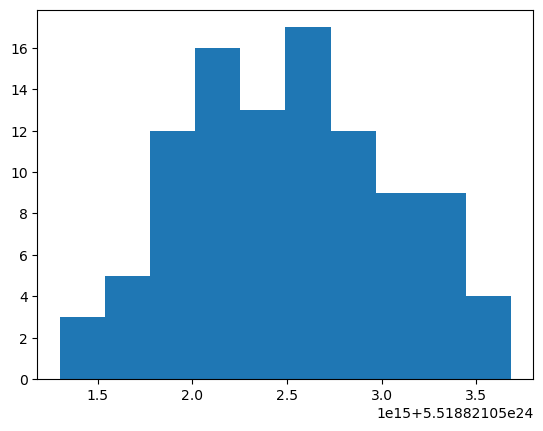

r= 18

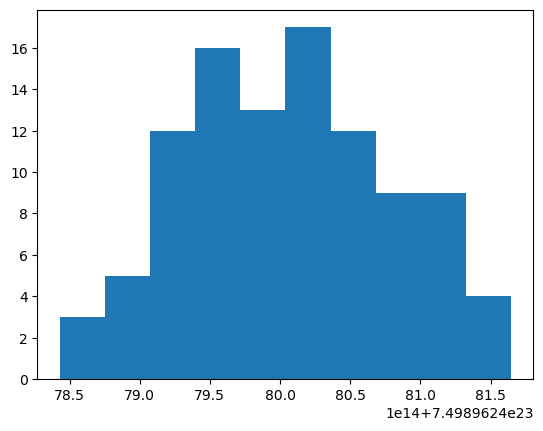

r= 16

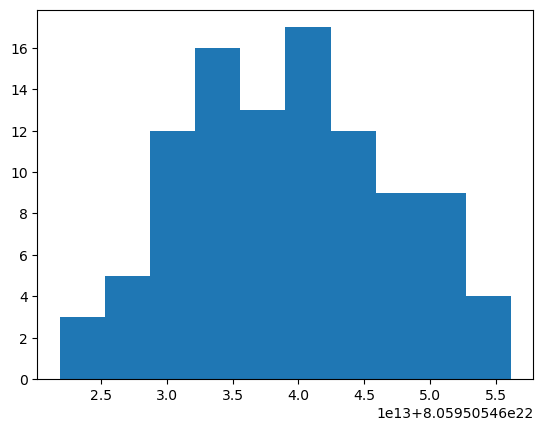

r= 17

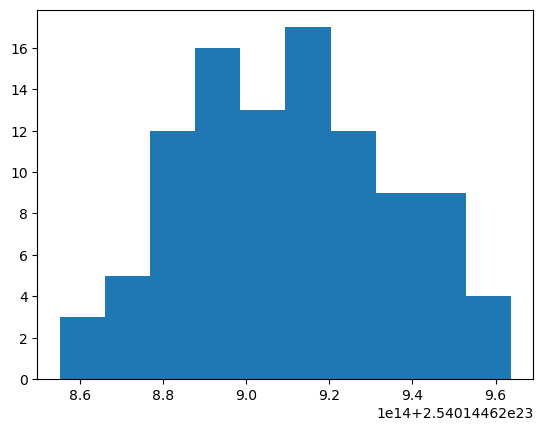

r= 14

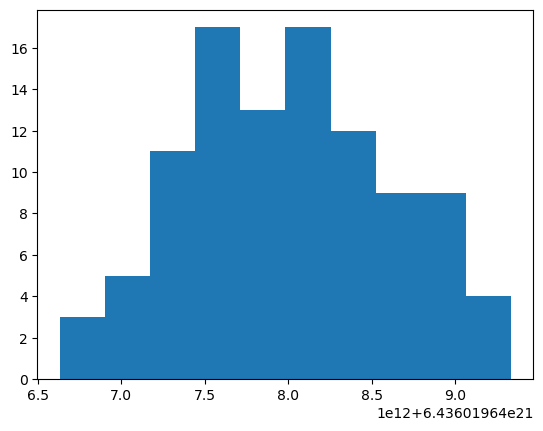

r= 15

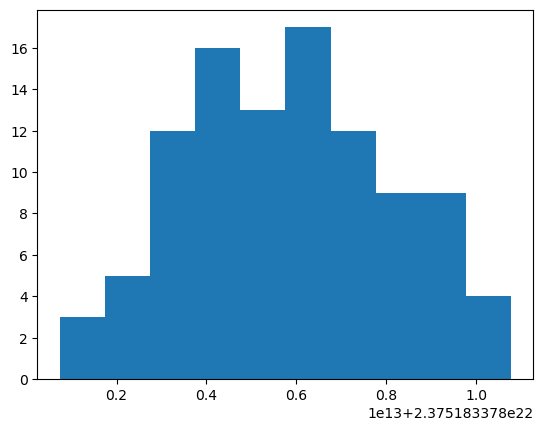

r= 13

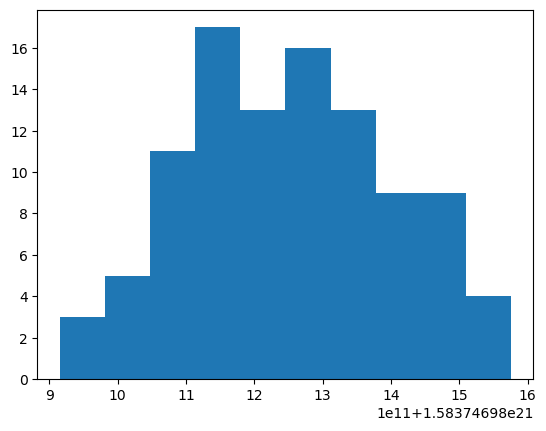

r= 11

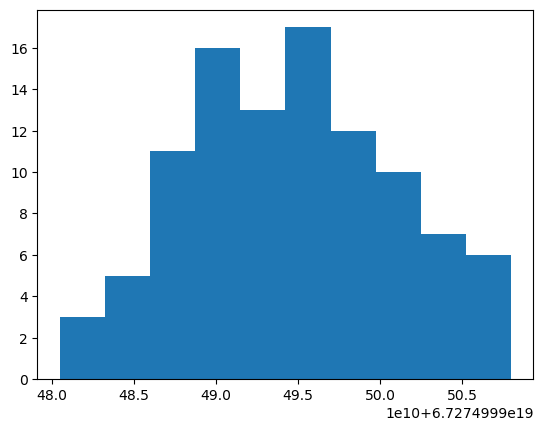

r= 12

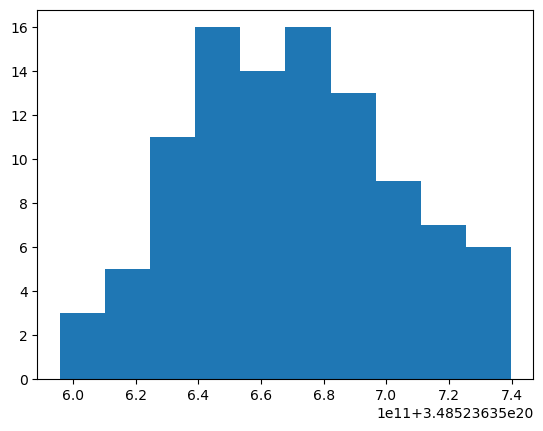

r= 9

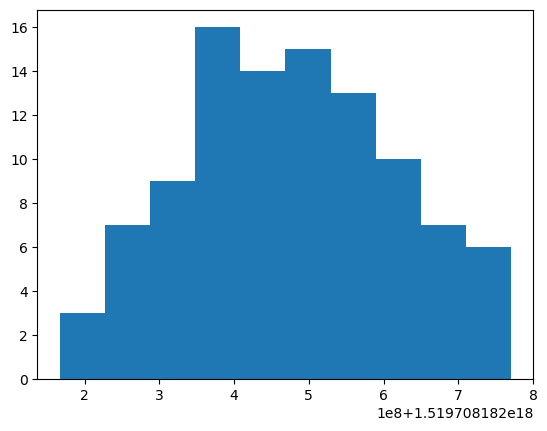

r= 10

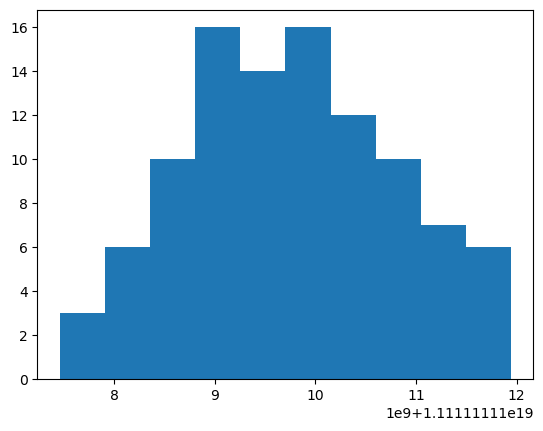

r= 8

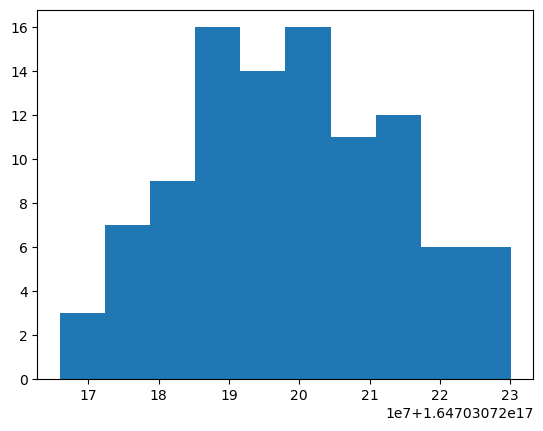

r= 6

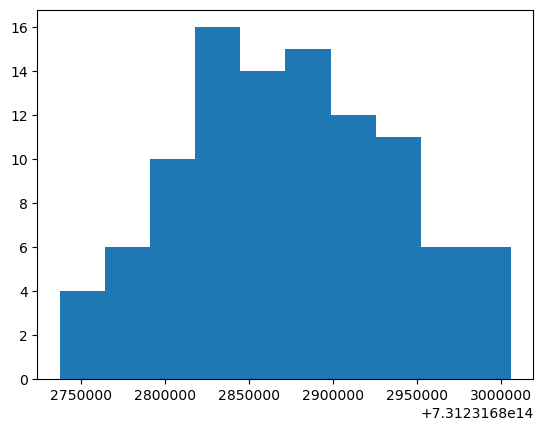

r= 7

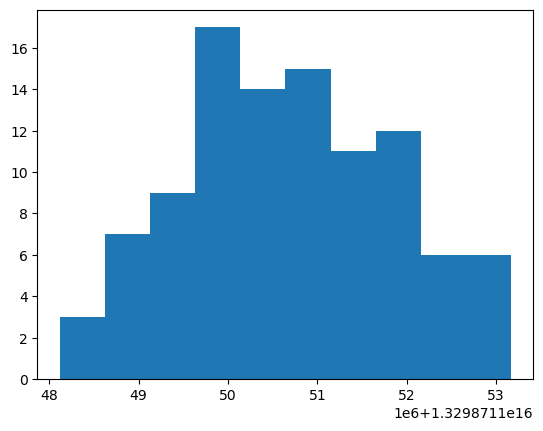

r= 4

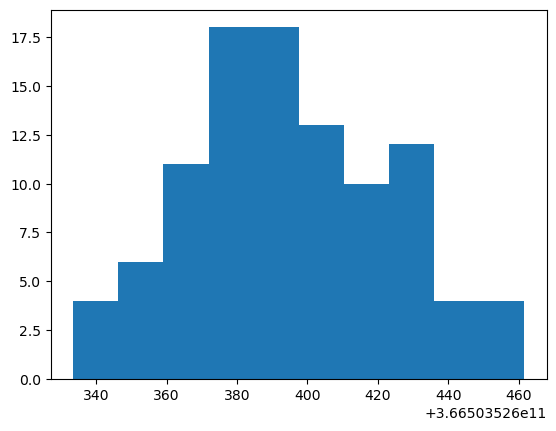

r= 5

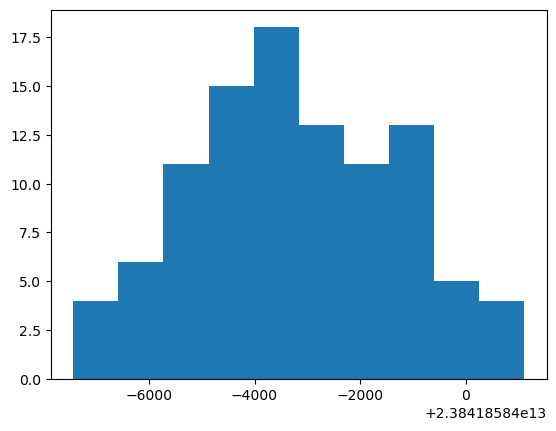

r= 3

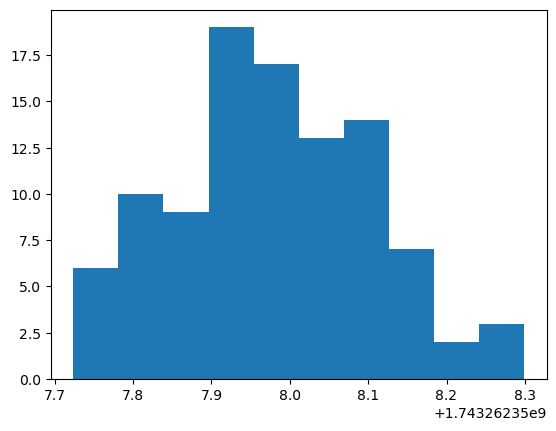

r= 1

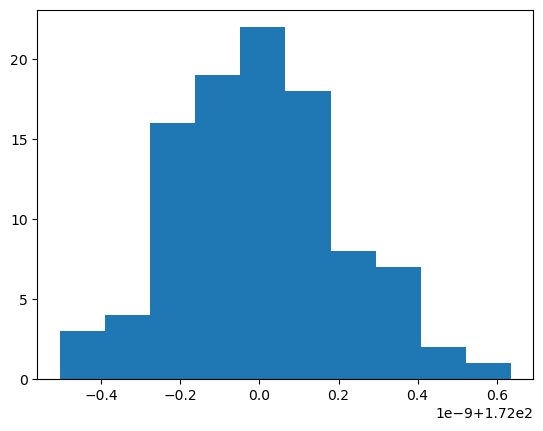

r= 2

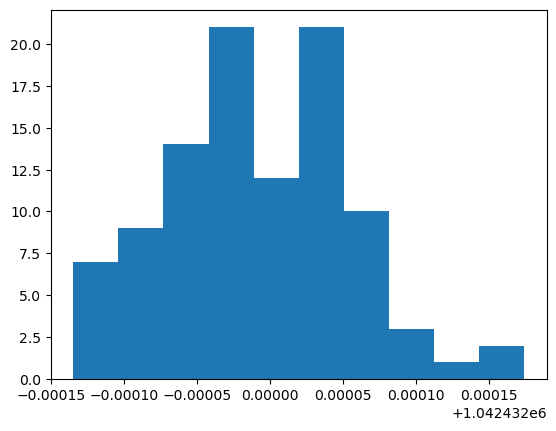

In [58]:
test(ec, x, dist_unif)